in this notebook, we compute the rank of the Gram matrix, defined as $G_{i,j} = \langle f_i | f_j\rangle$ (see notebook for Fig.09 for more information), versus the number of basis elements.

In [1]:
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import romb
from scipy.linalg import qr
from tqdm.auto import tqdm

from HQUAD_lib.QUAD_utils import solve_LZ
from HQUAD_lib.parallel_utils import parameter_run

In [2]:
alphas = np.linspace(-25, 25, 501)
beta = 0
ns_plus = (alphas + beta) / 2

zs_sol = parameter_run(solve_LZ, 'alpha', alphas, beta=beta, reduction=3)
s = np.linspace(0, 1, len(zs_sol[0]))

solve_LZ: [['alpha']]:   0%|          | 0/501 [00:00<?, ?it/s]

In [3]:
N = len(zs_sol)
ds = np.abs(s[1] - s[0])

G = np.zeros((N, N))

pbar = tqdm(range(N))
for i in pbar:
    G[i, :] = romb(zs_sol[i] * zs_sol, dx=ds, axis=-1)

  0%|          | 0/501 [00:00<?, ?it/s]

In [4]:
def get_rank(G: np.ndarray, size: int, tolerance=1e-10) -> int:
    indices = np.arange(-size // 2, size // 2) + N // 2

    G_2 = G[indices][:, indices]
    Q_2, R, pivot_indices = qr(G_2, pivoting=True)

    rank = np.sum(np.abs(np.diag(R)) > tolerance)
    return int(rank)

In [5]:
sizes = np.arange(1, N)

ranks = parameter_run(get_rank, 'size', sizes, G=G)
ranks = np.array(ranks).flatten()

get_rank: [['size']]:   0%|          | 0/500 [00:00<?, ?it/s]

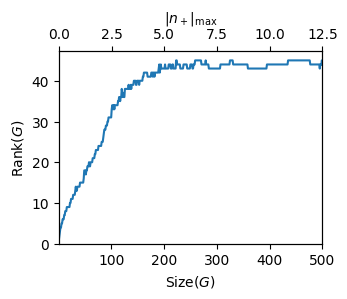

In [6]:
fig, ax = plt.subplots(figsize=(3.4, 2.5))

ax.plot(sizes, ranks, '-')
ax.set_xlim(min(sizes), max(sizes))
ax.set_ylim(0, max(ranks) * 1.05)

ax2 = ax.twiny()

ax.set_xlabel(r'$\operatorname{Size}(G)$')
ax.set_ylabel(r'$\operatorname{Rank}(G)$')
   
ax2.set_xbound(ax.get_xbound())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(ax.get_xticks() / np.max(sizes) * np.max(ns_plus))
ax2.set_xlabel(r'$|n_+|_{\max}$');